In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/elsevier/Bert-NER


In [2]:
all_runs = os.listdir('saved_models/')
for r in all_runs:
    print(r)

2024-04-09_n_0_b_1_s_1_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-09_n_0_b_1_s_18_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-09_n_0_b_1_s_2_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_22_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_2222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_22222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001


In [3]:
seeds = [2, 22, 222, 2222]
results = []
for i, seed in enumerate(seeds):
    run = all_runs[i + 2]
    print(run)
    result = pd.read_csv(f'saved_models/{run}/results.csv')
    results.append(result)

2024-04-09_n_0_b_1_s_2_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_22_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001
2024-04-10_n_0_b_1_s_2222_l_512_w_[0.3, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0]_l_0.0001


In [4]:
def mean_std(res_list, metric):
    vals = []
    for res in res_list:
        vals.append(res[metric])
    vals = np.array(vals)
    return np.mean(vals, axis=0), np.std(vals, axis=0)

In [5]:
n_epochs = len(results[0])
mean_train_loss, std_train_loss = mean_std(results, 'train_loss')
mean_train_accuracy, std_train_accuracy = mean_std(results, 'train_accuracy')
mean_test_accuracy, std_test_accuracy = mean_std(results, 'test_accuracy')

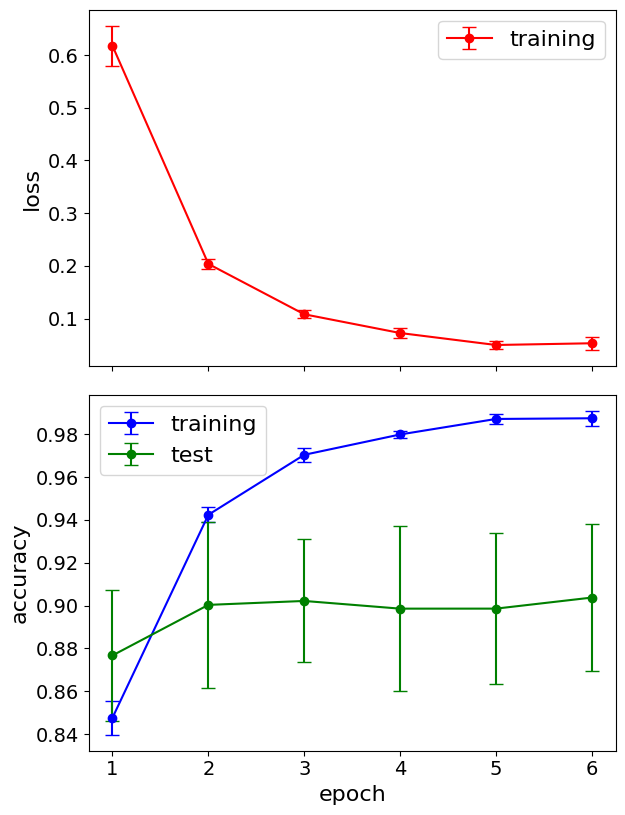

In [6]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(6, 8))
fig.tight_layout()

ax1.errorbar(range(1, n_epochs + 1), mean_train_loss, yerr=std_train_loss, marker='o',
             c='red', capsize=5, label='training')
ax1.legend(fontsize=16)
ax1.set_ylabel("loss", fontsize=16)
ax1.tick_params(labelsize=14)

ax2.errorbar(range(1, n_epochs + 1), mean_train_accuracy, yerr=std_train_accuracy, marker='o',
             c='blue', capsize=5, label='training')
ax2.errorbar(range(1, n_epochs + 1), mean_test_accuracy, yerr=std_test_accuracy, marker='o',
             c='green', capsize=5, label='test')
ax2.legend(fontsize=16)
ax2.set_xlabel("epoch", fontsize=16)
ax2.set_ylabel("accuracy", fontsize=16)
ax2.tick_params(labelsize=14)

plt.show()